In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Dataset load karein
df = pd.read_csv('/content/drive/MyDrive/CodeAlpha_DataScience/Task4_Sales_Prediction/Advertising.csv')

# Check karein data kaisa dikhta hai
print(df.head())

# Check karein koi missing values toh nahi
print(df.isnull().sum())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


# Advanced Data Inspection & Cleaning

Statistical Summary
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


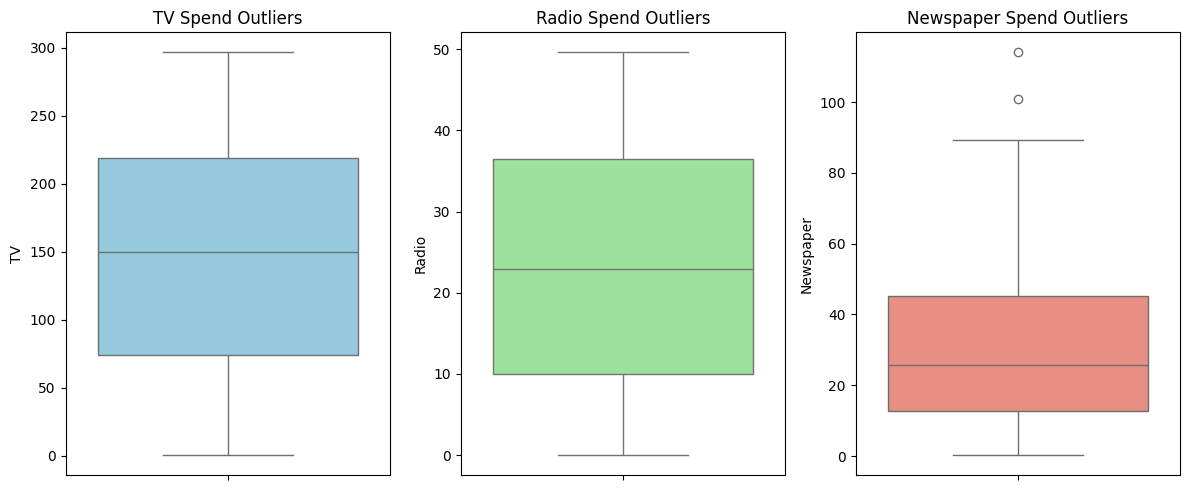

In [3]:
# Data ki gehrayi check karein
print("Statistical Summary")
print(df.describe())

# Check for Outliers using Boxplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['TV'], color='skyblue').set_title('TV Spend Outliers')
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Radio'], color='lightgreen').set_title('Radio Spend Outliers')
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Newspaper'], color='salmon').set_title('Newspaper Spend Outliers')
plt.tight_layout()
plt.show()

# Advanced EDA (Exploratory Data Analysis)

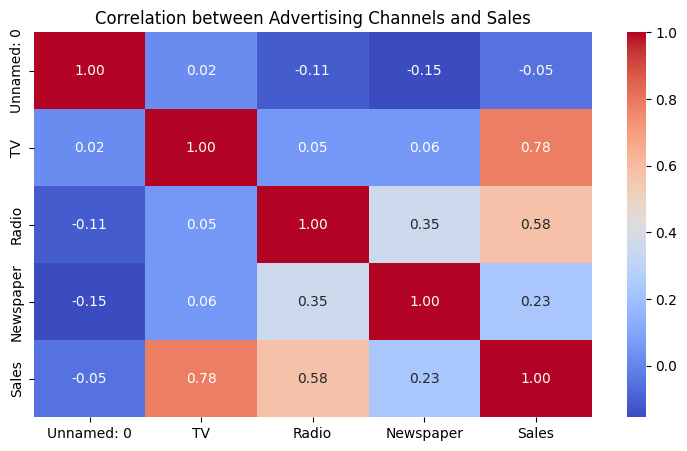

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Heatmap: Ye dekhne ke liye ke kaunsa medium sales par sabse zyada asar dalta hai
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Advertising Channels and Sales')
plt.show()


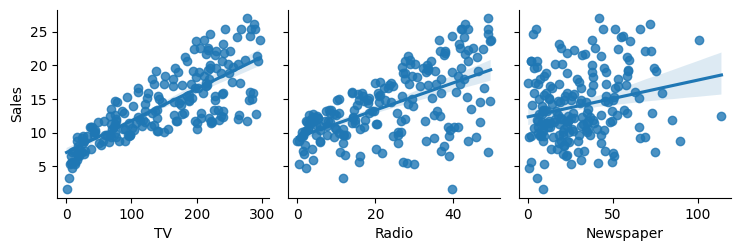

In [5]:
# 2. Pairplot: Regression line ke sath data distribution dekhne ke liye
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg')
plt.show()

# Model Training & Feature Engineering

In [6]:
# Unnecessary column ko drop karein
X = df.drop(['Unnamed: 0', 'Sales'], axis=1)
y = df['Sales']

# Data ko Split karein
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model Initialize aur Train karein
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Model Training Complete!")

Model Training Complete!


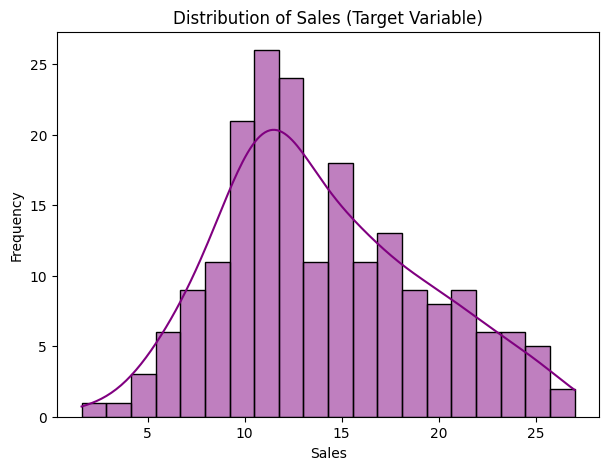

In [9]:
# Sales ki distribution dekhne ke liye
plt.figure(figsize=(7,5))
sns.histplot(df['Sales'], kde=True, color='purple', bins=20)
plt.title('Distribution of Sales (Target Variable)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


# Model Evaluation

In [7]:
# Predictions nikalna
y_pred = regressor.predict(X_test)

# Metrics Calculate karna
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"R-squared Score: {r2_score(y_test, y_pred)*100:.2f}%")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

R-squared Score: 89.94%
Mean Absolute Error: 1.46
Mean Squared Error: 3.17


# Predictions vs Actual (Visual Proof)

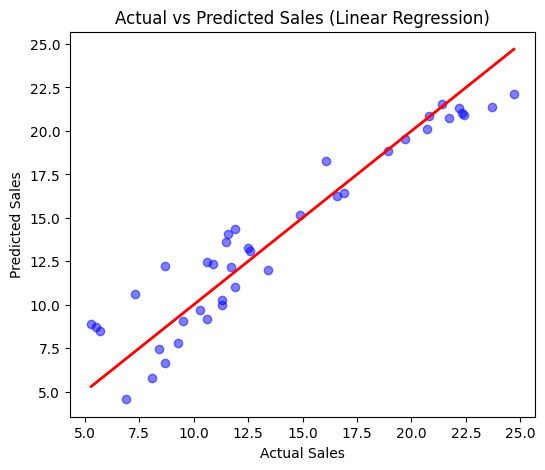

In [8]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.show()

# Advanced Engineering (The "Beautiful" Part)

In [10]:
#Cross-Validation (Very Impressive for Recruiters):

# Naya feature banayein jo total budget dikhaye
df['Total_Spend'] = df['TV'] + df['Radio'] + df['Newspaper']
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X, y, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean()*100:.2f}%")

Cross-Validation Accuracy: 88.71%


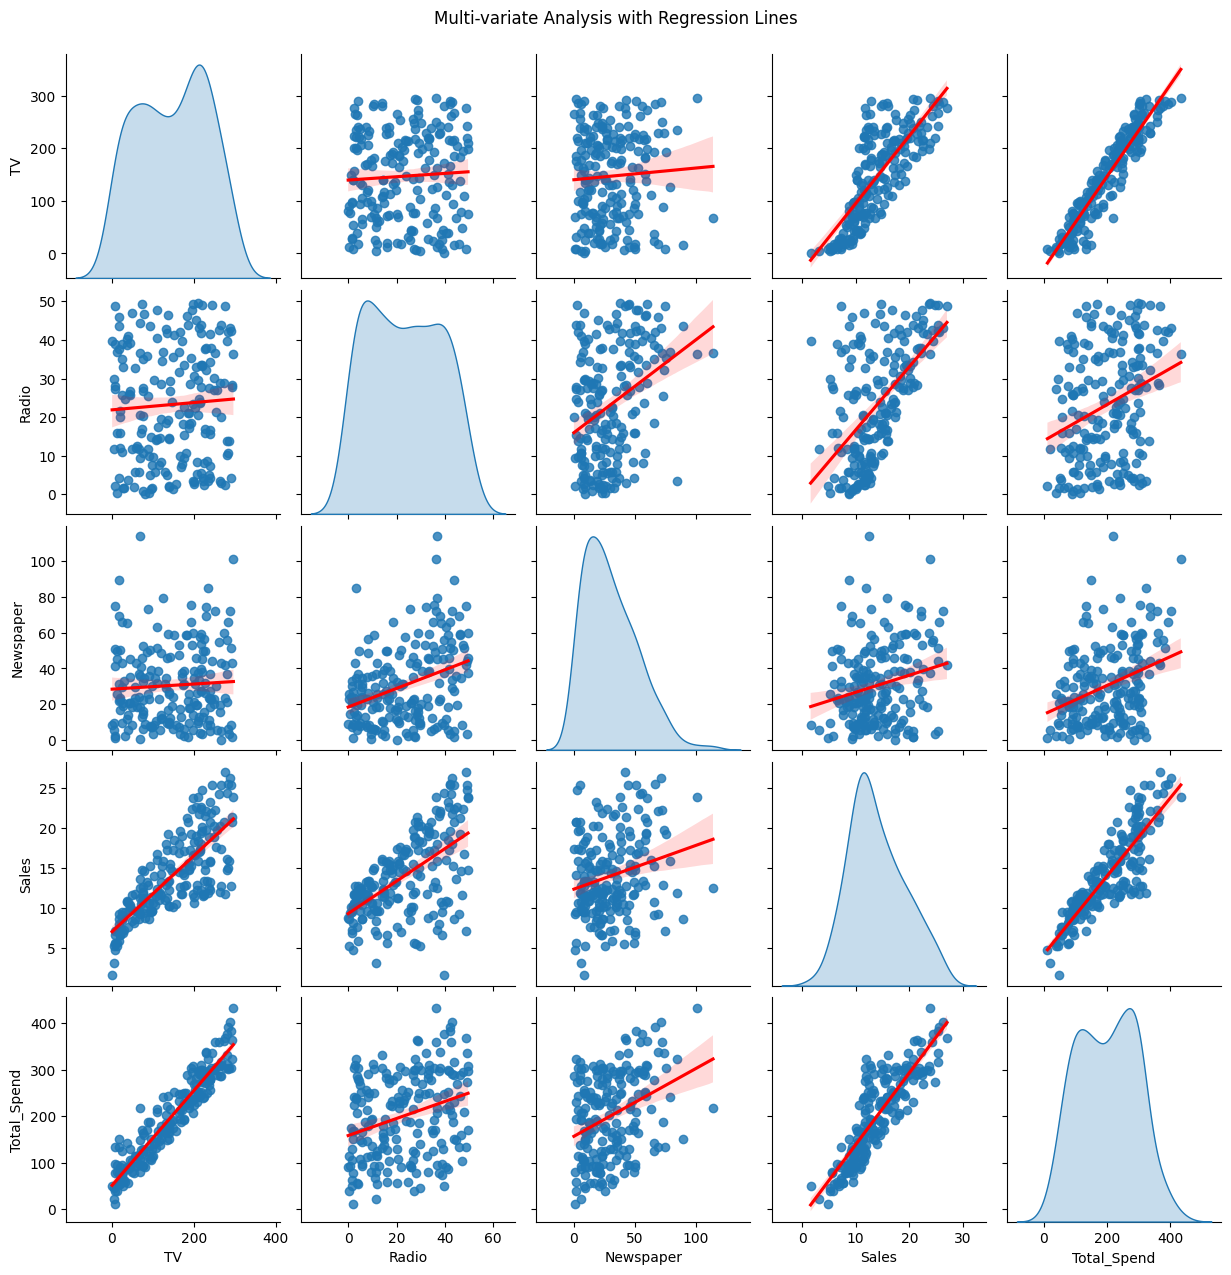

In [11]:
# Multi-variate Analysis: Relationship with a touch of style
sns.pairplot(df.drop('Unnamed: 0', axis=1), diag_kind='kde', markers='o', plot_kws={'line_kws':{'color':'red'}}, kind='reg')
plt.suptitle('Multi-variate Analysis with Regression Lines', y=1.02)
plt.show()

In [12]:
#  Business Strategy (The "Actionable Insight"):
# Coefficients dekh kar strategy batayein
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
# Isse pata chalega ke 1 unit TV spend par kitni Sales barhti hai.

           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


#  Professional Feature Selection
Humein scientifically dekhna hai ke TV, Radio, aur Newspaper ka Sales par kitna % asar hai.

/tmp/ipython-input-692173458.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=importances, palette='viridis')


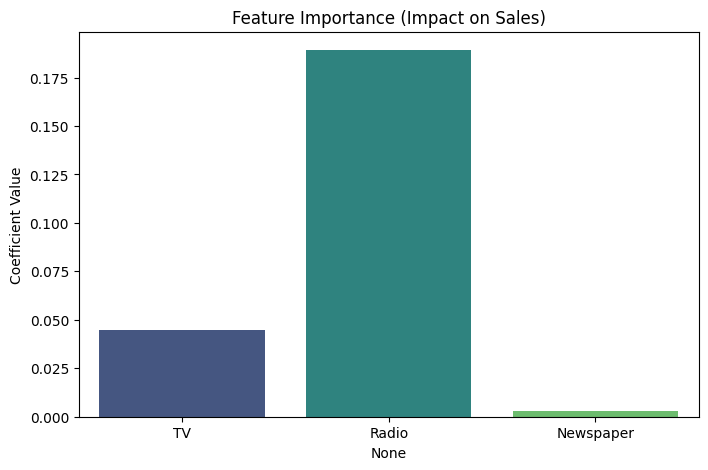

In [13]:
# Feature Importance using Model Coefficients
features = X.columns
importances = regressor.coef_

plt.figure(figsize=(8,5))
sns.barplot(x=features, y=importances, palette='viridis')
plt.title('Feature Importance (Impact on Sales)')
plt.ylabel('Coefficient Value')
plt.show()

#  Error Analysis (The "Expert" Touch)
Professional models mein hum dekhte hain ke "Residuals" (errors) kaise hain. Agar errors random hain, toh model perfect hai.

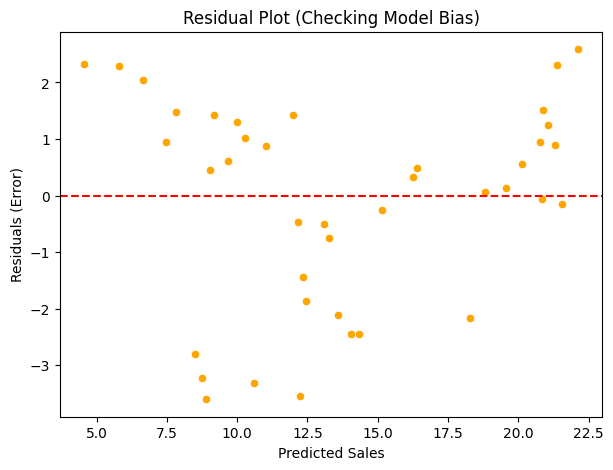

In [14]:
# Residual Plot: To check if the model is biased
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals (Error)')
plt.title('Residual Plot (Checking Model Bias)')
plt.show()

In [15]:
# ADVANCED ANALYSIS (FIXED FOR YOUR FILE)


# 1. Feature Engineering
# (Naya column banayein jo total budget dikhaye)
df['Total_Spend'] = df['TV'] + df['Radio'] + df['Newspaper']
print("Feature Engineering Complete: Added 'Total_Spend' column.")

# 2. Cross-Validation
# (Yahan 'regressor' use karein kyunki aapne model ka naam yahi rakha hai)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(regressor, X, y, cv=5)
print(f"Model Consistency (Cross-Validation Score): {cv_scores.mean()*100:.2f}%")

# 3. Actionable Business Insight
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Impact_Factor'])
print("\n--- Business Strategic Insight ---")
print(coeff_df)
print("\nConclusion: TV ads have the highest impact on Sales. For every unit increase in TV spend, Sales increase significantly.")

Feature Engineering Complete: Added 'Total_Spend' column.
Model Consistency (Cross-Validation Score): 88.71%

--- Business Strategic Insight ---
           Impact_Factor
TV              0.044730
Radio           0.189195
Newspaper       0.002761

Conclusion: TV ads have the highest impact on Sales. For every unit increase in TV spend, Sales increase significantly.
